# GRADUATE ADMISSIONS:

Our aim here is to conduct a exploratory data analysis and admission predictions using linear regression and random forest model.

The dataset contains several parameters which are considered important during the application for Masters Programs. The parameters included are :

GRE Scores ( out of 340 )

TOEFL Scores ( out of 120 )

University Rating ( out of 5 )

Statement of Purpose and Letter of Recommendation Strength ( out of 5 )

Undergraduate GPA ( out of 10 )

Research Experience ( either 0 or 1 )

Chance of Admit ( ranging from 0 to 1 )

Dataset: https://www.kaggle.com/mohansacharya/graduate-admissions/home

In [63]:

import pandas as pd
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [64]:
df=pd.read_csv('/home/kavita/kavita/predictive analytics/Admission_Predict.csv')

In [65]:
print(df.shape)

(500, 9)


In [66]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
Serial No.           500 non-null int64
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(5)
memory usage: 35.2 KB


In [68]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [69]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [70]:
df.columns = df.columns.str.strip()

In [71]:
df.columns = [c.replace(' ','_') for c in df.columns]

In [72]:
df.dtypes

Serial_No.             int64
GRE_Score              int64
TOEFL_Score            int64
University_Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance_of_Admit      float64
dtype: object

In [73]:
df.isnull().values.any()

False

In [74]:
df=df.drop(['Serial_No.'],axis=1)

In [75]:
df.corr()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
GRE_Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL_Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University_Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance_of_Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


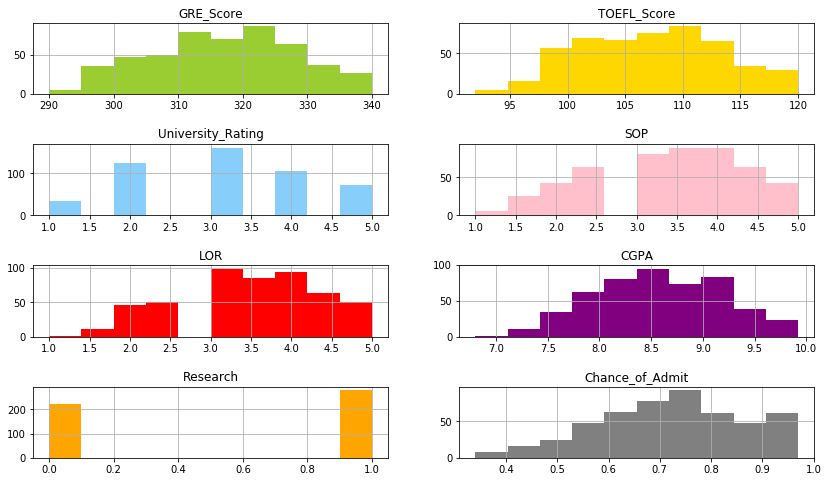

In [76]:
category = ['GRE_Score','TOEFL_Score','University_Rating','SOP','LOR','CGPA','Research','Chance_of_Admit']
color = ['yellowgreen','gold','lightskyblue','pink','red','purple','orange','gray']
start = True
for i in np.arange(4):
    
    if start == True:
        fig = plt.figure(figsize=(14,8))
        start = False
        
    plt.subplot2grid((4,2),(i,0))
    df[category[2*i]].hist(color=color[2*i])
    plt.title(category[2*i])
    plt.subplot2grid((4,2),(i,1))
    df[category[2*i+1]].hist(color=color[2*i+1])
    plt.title(category[2*i+1])
    
plt.subplots_adjust(hspace = 0.7, wspace = 0.2)    
plt.show()

In [77]:
# Let's quantify the correlations between the features with the target and see what variables have more impact in the admisson.

corr= df.corr()['Chance_of_Admit'].sort_values(ascending=False)
print(corr)
# Conclusions:
#    - We have basic three groups of influencers: high(CGPA, GRE and TOEFL), intermediary(University rating, SOP and LOR) and low(Research);
#    - All of them have a positive influence.

Chance_of_Admit      1.000000
CGPA                 0.882413
GRE_Score            0.810351
TOEFL_Score          0.792228
University_Rating    0.690132
SOP                  0.684137
LOR                  0.645365
Research             0.545871
Name: Chance_of_Admit, dtype: float64


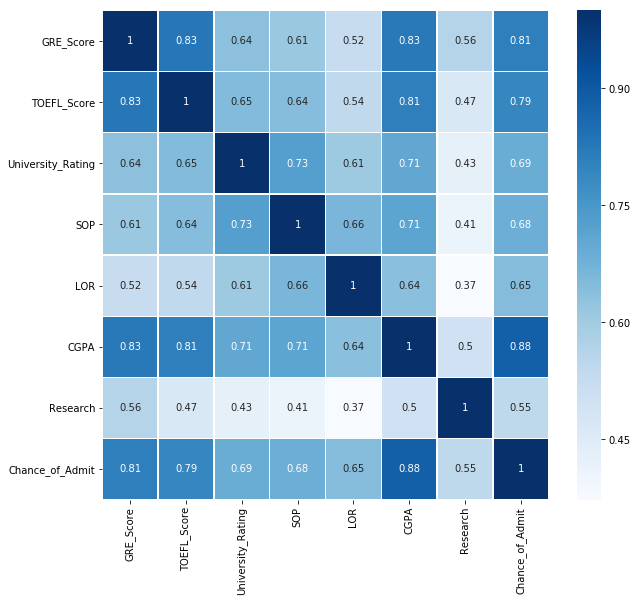

In [78]:
# correlation matrix
fig, ax = plt.subplots(figsize=(10, 9))
sns.heatmap(df.corr(), linewidths=0.3, cmap='Blues', annot=True)

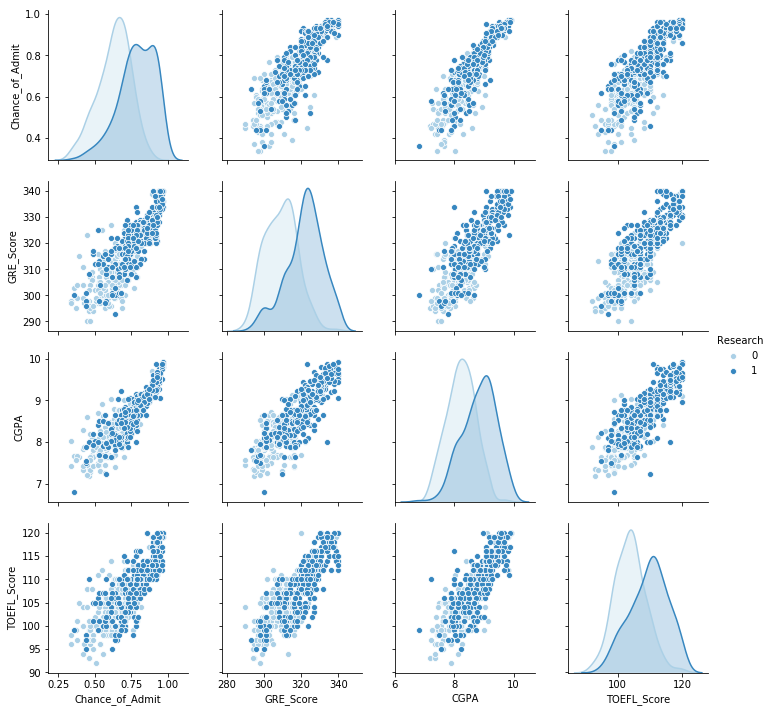

In [79]:
# Three most important features
sns.pairplot(df, vars=["Chance_of_Admit", "GRE_Score", "CGPA", "TOEFL_Score"], hue="Research", palette="Blues")

# As we see, GRE, TOEFL, CGPA are highly correlated to Admission. So, if we have good CGPA and if our GRE, TOEFL score is good. There's high chance to get admission.

Text(0.5, 1.0, 'GRE_Score vs Chance of Admit')

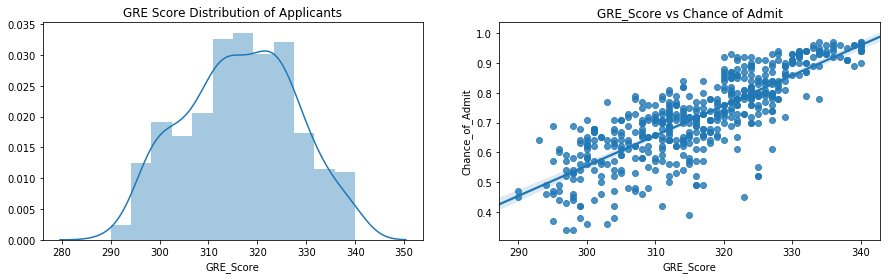

In [80]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.distplot(df['GRE_Score'])
plt.title('GRE Score Distribution of Applicants')

plt.subplot(1,2,2)
sns.regplot(df['GRE_Score'], df['Chance_of_Admit'])
plt.title('GRE_Score vs Chance of Admit')

Text(0.5, 1.0, 'CGPA vs Chance of Admit')

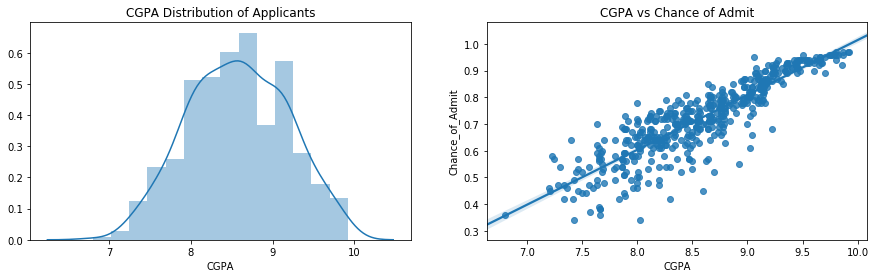

In [81]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.distplot(df['CGPA'])
plt.title('CGPA Distribution of Applicants')

plt.subplot(1,2,2)
sns.regplot(df['CGPA'], df['Chance_of_Admit'])
plt.title('CGPA vs Chance of Admit')

Text(0.5, 1.0, 'TOEFL_Score vs Chance of Admit')

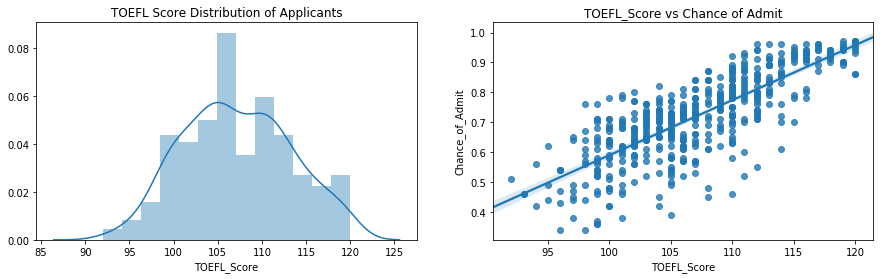

In [82]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.distplot(df['TOEFL_Score'])
plt.title('TOEFL Score Distribution of Applicants')

plt.subplot(1,2,2)
sns.regplot(df['TOEFL_Score'], df['Chance_of_Admit'])
plt.title('TOEFL_Score vs Chance of Admit')

Text(0.5, 1.0, 'Research Distribution')

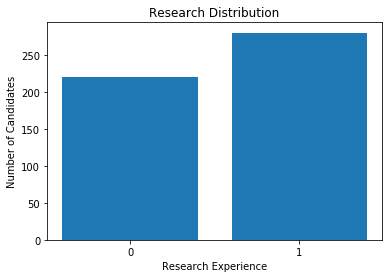

In [83]:
# Now let's take a look at the distribution of our Research feature
x=['0','1']
y = np.array([len(df[df.Research == 0]),len(df[df.Research == 1])])
plt.bar(x,y)
plt.xlabel('Research Experience')
plt.ylabel('Number of Candidates')
plt.title('Research Distribution')

In [84]:
# we have more candidates that have research experience, then the candidates who don't.

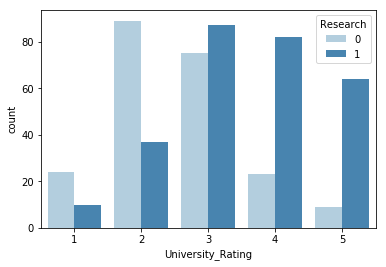

In [85]:
# are candidates from better universities more likely to do research
sns.countplot(x="University_Rating", hue="Research", data=df, palette='Blues')

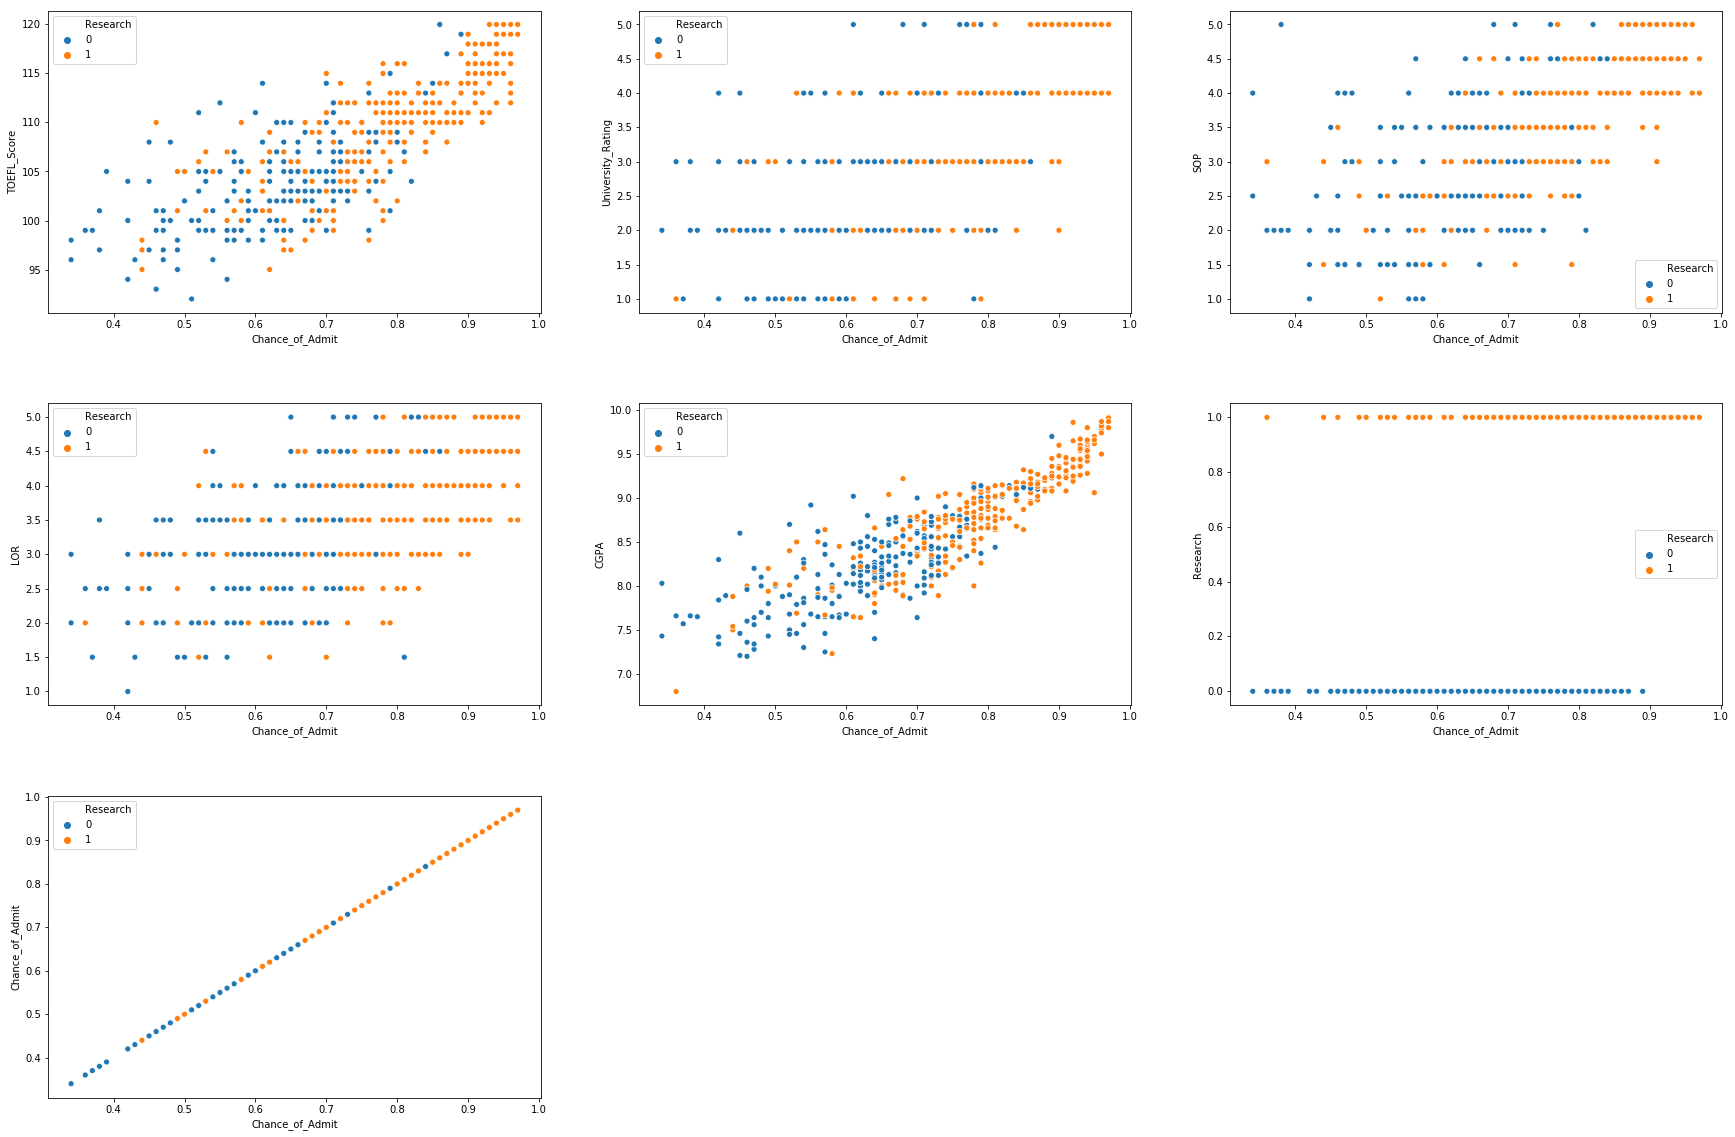

In [86]:

fig = plt.figure(figsize=(30,20))
fig.subplots_adjust(hspace=0.3, wspace=0.2)
for i in range(1,8 ):
    ax = fig.add_subplot(3, 3, i)
    sns.scatterplot(x=df['Chance_of_Admit'], y= df.iloc[:,i], hue=df.Research)
    plt.xlabel('Chance_of_Admit')
    plt.ylabel(df.columns[i])

# - The better graph of the features 'UniversityRating', 'SOP', 'LOR' and 'Research' is not scatterplot;¶
- 'GRE', 'TOEFL' and 'CGPA' graphs have a linear behavior;
- The tendency which we can see is, as higher as the 'GRE', 'TOEFL' and 'CGPA' higher is the chance of admission;
- The other tendency that we can see is if the person has a research has more probability to be admitted.
- If you want to go to university with high rating, you need research experience.

# Split Into Training and Testing Sets for Regression Approach

In [87]:
# # # Split Into Training and Testing Sets

# Separate out the features and targets
from sklearn.model_selection import train_test_split


features = df.drop(columns='Chance_of_Admit')
targets = pd.DataFrame(df['Chance_of_Admit'])
# Split into 70% training and 30% testing set
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size = 0.25, random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(375, 7)
(125, 7)
(375, 1)
(125, 1)


In [88]:
df.columns

Index(['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance_of_Admit'],
      dtype='object')

# Using Linear Regression for Regression Approach

In [89]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)
print("score: ", lin_reg.score(X_test,y_test))

score:  0.8163213016062121


In [90]:
# print the coefficients
intercepts=lin_reg.intercept_
print('Intercepts: \n',intercepts)
coefficients=lin_reg.coef_
print('Coefficients: \n',coefficients)

Intercepts: 
 [-1.40411605]
Coefficients: 
 [[0.00216508 0.00331129 0.00237087 0.00121341 0.01705316 0.11682683
  0.024134  ]]


In [91]:
# calculate R Squared for training data and testing data 
lin_predicted=lin_reg.predict(X_train)
lin_pred = lin_reg.predict(X_test)
print('Linear Regression R squared for training data": %.4f' % lin_reg.score(X_train, y_train))
print('Linear Regression R squared testing data": %.4f' % lin_reg.score(X_test, y_test))

Linear Regression R squared for training data": 0.8223
Linear Regression R squared testing data": 0.8163


In [92]:
# Adjusted R^2 for training
adjusted_r_squared_train  = 1 - (1-lin_reg.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
adjusted_r_squared_train

0.8189559118283551

In [93]:
# calculate Root Mean Square Error for testing data
from sklearn import metrics  
print('Mean Absolute Error for testing data :',  metrics.mean_absolute_error(y_test, lin_pred))  
print('Mean Squared Error for testing data : ',  metrics.mean_squared_error(y_test,lin_pred))  
print('Root Mean Squared Error for testing data :',  np.sqrt(metrics.mean_squared_error(y_test, lin_pred)))


##pd.DataFrame(zip(X.columns, linear_model.coef_), columns = ['features', 'estimatedCoefficients'

Mean Absolute Error for testing data : 0.043111848018060686
Mean Squared Error for testing data :  0.0035857302916122435
Root Mean Squared Error for testing data : 0.059880967691013844


In [94]:
# calculate Root Mean Square Error for training data
from sklearn import metrics  
print('Mean Absolute Error for training  data :',  metrics.mean_absolute_error(y_train, lin_predicted))  
print('Mean Squared Error for training  data : ',  metrics.mean_squared_error(y_train,lin_predicted))  
print('Root Mean Squared Error for training  data :',  np.sqrt(metrics.mean_squared_error(y_train, lin_predicted)))


##pd.DataFrame(zip(X.columns, linear_model.coef_), columns = ['features', 'estimatedCoefficients'

Mean Absolute Error for training  data : 0.04251234385111585
Mean Squared Error for training  data :  0.0035505158671884024
Root Mean Squared Error for training  data : 0.05958620534308593


In [95]:
 # Plotting Actual vs Predicted

Text(0.5, 0.98, 'Actual vs Predicted')

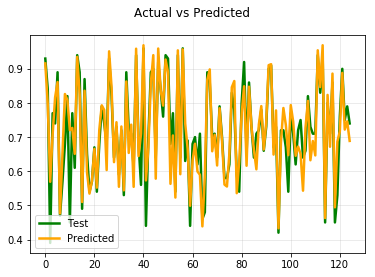

In [96]:
fig = plt.figure()
c = [i for i in range(0,125,1)]
plt.plot(c,y_test, color = 'green', linewidth = 2.5, label='Test')
plt.plot(c,lin_pred, color = 'orange', linewidth = 2.5, label='Predicted')
plt.grid(alpha = 0.3)
plt.legend()
fig.suptitle('Actual vs Predicted')

In [97]:
# Plotting Error

Text(0.5, 0.98, 'Error Terms')

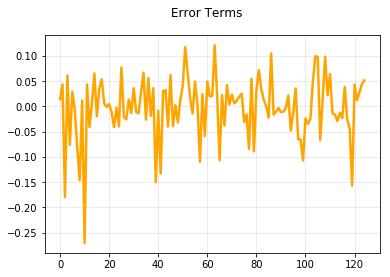

In [98]:
fig = plt.figure()
plt.plot(c,y_test-lin_pred, color = 'orange', linewidth = 2.5)
plt.grid(alpha = 0.3)
fig.suptitle('Error Terms')

In [99]:
Xs = X_train.values
y = y_train.values

In [106]:
import statsmodels.api as sm 
X2 = sm.add_constant(Xs)
est = sm.OLS(y,X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     242.7
Date:                Thu, 13 Jun 2019   Prob (F-statistic):          1.72e-133
Time:                        21:54:06   Log-Likelihood:                 525.52
No. Observations:                 375   AIC:                            -1035.
Df Residuals:                     367   BIC:                            -1004.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4041      0.128    -10.935      0.0

In [107]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif["features"] = X_train.columns

In [108]:
vif.round(1)

,VIF Factor,features
0,1270.6,GRE_Score
1,1123.1,TOEFL_Score
2,20.6,University_Rating
3,34.4,SOP
4,30.2,LOR
5,935.2,CGPA
6,2.9,Research


In [109]:
# VIF values obtained for the predicted variables (CGPA, Chance of Admit ,TOEFL Score) is within the level of acceptance.
# VIF Under Ideal Conditions should be less than 3 but it is still acceptable if it under 10

# Data Manipulation for Using classification Model

In [110]:
df_x=pd.read_csv('/home/kavita/kavita/predictive analytics/trainingData.csv')
df_y=pd.read_csv('/home/kavita/kavita/predictive analytics/testingData.csv')

In [111]:
df_x.head()

,Unnamed: 0,GRE.Score,TOEFL.Score,University.Rating,SOP,LOR,CGPA,Research,Admission
0,2,0.666481,-0.031569,0.774806,0.631683,1.097845,0.485373,0.885518,1
1,3,-0.041788,-0.524839,-0.099693,-0.377395,0.017289,-0.953088,0.885518,0
2,4,0.489414,0.461700,-0.099693,0.127144,-1.063267,0.154692,0.885518,1
3,6,1.197682,1.283816,1.649305,1.136222,-0.522989,1.262473,0.885518,1
4,7,0.400880,0.297277,-0.099693,-0.377395,0.557567,-0.622407,0.885518,0


In [112]:
df_y.head()

,Unnamed: 0,GRE.Score,TOEFL.Score,University.Rating,SOP,LOR,CGPA,Research,Admission
0,1,1.817417,1.777086,0.774806,1.136222,1.097845,1.775029,0.885518,1
1,5,-0.218855,-0.689262,-0.974192,-1.386473,-0.522989,-0.605873,-1.127023,0
2,11,0.755014,-0.195992,-0.099693,0.127144,0.557567,-0.291727,0.885518,0
3,13,1.020615,0.790547,0.774806,0.631683,1.097845,0.865656,0.885518,1
4,16,-0.218855,-0.360416,-0.099693,0.127144,-1.063267,-0.457067,-1.127023,0


In [113]:
X_train=df_x.iloc[:,[1,2,3,4,5,6,7]].values
y_train = df_x.iloc[:, -1].values
X_test=df_y.iloc[:,[1,2,3,4,5,6,7]].values
y_test = df_y.iloc[:, -1].values
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(376, 7)
(376,)
(124, 7)
(124,)


# Prediction using KNN Algorithm

In [114]:
# instantiate learning model (k = 3)
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.metrics import accuracy_score 
knn1 = KNeighborsClassifier(n_neighbors=3)

In [115]:
model1_knn_test = knn1.fit(X_train,y_train)
print("score: ", knn1.score(X_test,y_test))
pred1 = knn1.predict(X_test)

score:  0.8870967741935484


Text(91.68, 0.5, 'Predicted')

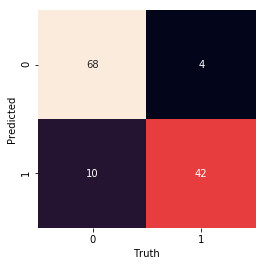

In [116]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
conf_mat_test1 = metrics.confusion_matrix(y_test,pred1)
names = np.unique(pred1)
sns.heatmap(conf_mat_test1, square=True, annot=True, fmt='d',cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Truth')
plt.ylabel('Predicted')

In [117]:
print(metrics.classification_report(y_test,pred1)) 
Test_Accuracy_knn1=accuracy_score(y_test,pred1)
print('Testing Accuracy :',Test_Accuracy_knn1)

              precision    recall  f1-score   support

           0       0.87      0.94      0.91        72
           1       0.91      0.81      0.86        52

   micro avg       0.89      0.89      0.89       124
   macro avg       0.89      0.88      0.88       124
weighted avg       0.89      0.89      0.89       124

Testing Accuracy : 0.8870967741935484


In [118]:
model1_knn_train = knn1.fit(X_test, y_test)
predicted1 = knn1.predict(X_train)

Text(91.68, 0.5, 'Predicted')

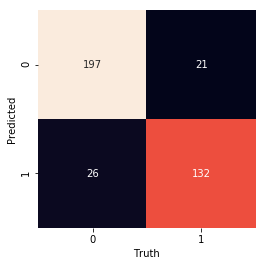

In [119]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
conf_mat_train1 = metrics.confusion_matrix(y_train,predicted1)
names = np.unique(predicted1)
sns.heatmap(conf_mat_train1, square=True, annot=True, fmt='d',cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Truth')
plt.ylabel('Predicted')

In [120]:
print(metrics.classification_report(y_train,predicted1)) 
Train_Accuracy_knn1=accuracy_score(y_train,predicted1)
print('Training Accuracy is :',Train_Accuracy_knn1)

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       218
           1       0.86      0.84      0.85       158

   micro avg       0.88      0.88      0.88       376
   macro avg       0.87      0.87      0.87       376
weighted avg       0.87      0.88      0.87       376

Training Accuracy is : 0.875


In [121]:
# Taking neighbour as a sqrt of total no of training points which is  20

In [122]:
knn2 = KNeighborsClassifier(n_neighbors=20)
model2_knn_test = knn2.fit(X_train, y_train)
#model_knn
pred2 = knn2.predict(X_test)

Text(91.68, 0.5, 'Predicted')

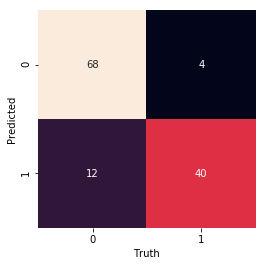

In [123]:
conf_mat_test2 = metrics.confusion_matrix(y_test,pred2)
names = np.unique(pred2)
sns.heatmap(conf_mat_test2, square=True, annot=True, fmt='d',cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Truth')
plt.ylabel('Predicted')

In [124]:
print(metrics.classification_report(y_test,pred2)) 
Test_Accuracy_knn2=accuracy_score(y_test,pred2)
print('Testing Accuracy is :',Test_Accuracy_knn2)

              precision    recall  f1-score   support

           0       0.85      0.94      0.89        72
           1       0.91      0.77      0.83        52

   micro avg       0.87      0.87      0.87       124
   macro avg       0.88      0.86      0.86       124
weighted avg       0.87      0.87      0.87       124

Testing Accuracy is : 0.8709677419354839


In [125]:
model2_knn_train = knn2.fit(X_test, y_test)
#model_knn
predicted2 = knn2.predict(X_train)

Text(91.68, 0.5, 'Predicted')

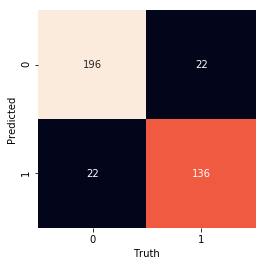

In [126]:
conf_mat_train2 = metrics.confusion_matrix(y_train,predicted2)
names = np.unique(predicted2)
sns.heatmap(conf_mat_train2, square=True, annot=True, fmt='d',cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Truth')
plt.ylabel('Predicted')

In [127]:
print(metrics.classification_report(y_train,predicted2)) 
Train_Accuracy_knn2=accuracy_score(y_train,predicted2)
print('Training Accuracy is:',Train_Accuracy_knn2)


              precision    recall  f1-score   support

           0       0.90      0.90      0.90       218
           1       0.86      0.86      0.86       158

   micro avg       0.88      0.88      0.88       376
   macro avg       0.88      0.88      0.88       376
weighted avg       0.88      0.88      0.88       376

Training Accuracy is: 0.8829787234042553


In [128]:
 # Cross Validation in KNN 

In [129]:
# creating odd list of K for KNN
neighbors = list(range(1,50,2))
print(neighbors)


[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49]


In [130]:
# perform 10-fold cross validation for testing set 
scores = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

print(scores)

[0.8387096774193549, 0.8870967741935484, 0.8951612903225806, 0.8629032258064516, 0.8790322580645161, 0.8709677419354839, 0.8629032258064516, 0.8629032258064516, 0.8709677419354839, 0.8709677419354839, 0.8790322580645161, 0.8870967741935484, 0.8870967741935484, 0.8870967741935484, 0.8870967741935484, 0.8951612903225806, 0.9032258064516129, 0.8951612903225806, 0.8951612903225806, 0.8870967741935484, 0.8951612903225806, 0.9032258064516129, 0.9032258064516129, 0.8951612903225806, 0.8951612903225806]


In [131]:
# perform 10-fold cross validation for training set 
scores = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_test, y_test)
    y_predicted = knn.predict(X_train)
    scores.append(metrics.accuracy_score(y_train, y_predicted))

print(scores)

[0.851063829787234, 0.875, 0.8856382978723404, 0.898936170212766, 0.9042553191489362, 0.898936170212766, 0.8882978723404256, 0.8856382978723404, 0.8803191489361702, 0.8803191489361702, 0.8829787234042553, 0.8803191489361702, 0.8856382978723404, 0.8803191489361702, 0.8829787234042553, 0.8856382978723404, 0.8803191489361702, 0.8803191489361702, 0.8803191489361702, 0.8776595744680851, 0.8803191489361702, 0.8803191489361702, 0.8803191489361702, 0.8803191489361702, 0.8776595744680851]


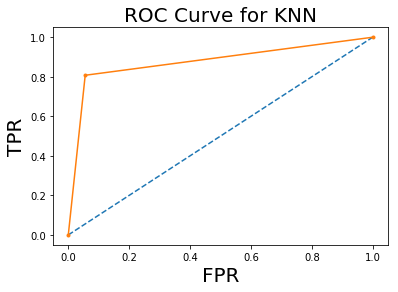

In [132]:
#ROC Curve for KNN
plt.figure()
plt.rcParams['figure.figsize'] = 7,7
fpr,tpr,threshold = roc_curve(y_test,pred1)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('FPR',fontsize = 20)
plt.ylabel('TPR',fontsize = 20)
plt.title('ROC Curve for KNN',fontsize = 20)
plt.show()

In [133]:
### Conclusion for KNN Approach ###
# for k=3
    # Training accuracy for neighbor(k=3) is .8870
    # Testing accuracy for neighbor(k=3) is .875
# for k=5
    # Training accuracy for neighbor(k=5) is .8951
    # Testing accuracy for neighbor(k=5) is .8856
# for k=7  
    # Training accuracy for neighbor(k=7) is .8629
    # Testing accuracy for neighbor(k=7) is .8989
# for k=9  
    # Training accuracy for neighbor(k=9) is .8790
    # Testing accuracy for neighbor(k=9) is .9042
# for k=11  
    # Training accuracy for neighbor(k=11) is .8709
    # Testing accuracy for neighbor(k=11) is .8989
# for k=15   
    # Training accuracy for neighbor(k=15) is .8629
    # Testing accuracy for neighbor(k=15) is .888
# for k=20  
    # Training accuracy for neighbor(k=20) is .8709
    # Testing accuracy for neighbor(k=20) is .8829
    
# So k=15 will be the perfect

# Prediction using Naive Bayes 

In [134]:
from sklearn.naive_bayes import GaussianNB
gnb= GaussianNB()
gnb

GaussianNB(priors=None, var_smoothing=1e-09)

In [135]:
# Predicting the Test set results
gnb_model_test = gnb.fit(X_train, y_train)
print("score: ",gnb.score(X_test,y_test))
y_pred = gnb.predict(X_test)
print(y_pred)

score:  0.8790322580645161
[1 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0
 1 0 1 1 1 0 0 0 0 0 0 1 1 1 1 0 1 1 0 0 1 0 0 0 1 1 0 1 1 1 1 0 1 0 0 1 0
 0 1 1 0 0 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0
 0 1 0 0 1 0 0 1 1 0 0 1 0]


Text(0.5, 42.0, 'Truth')

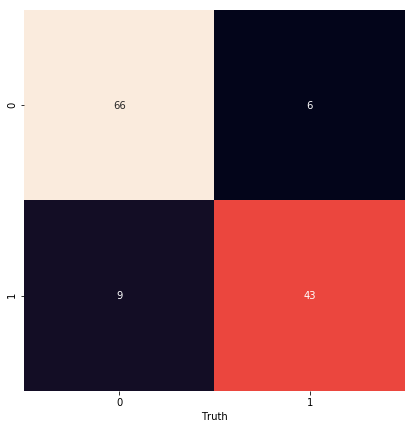

In [136]:
from sklearn.metrics import confusion_matrix
cm_test_gnb = confusion_matrix(y_test, y_pred)
names = np.unique(y_pred)
sns.heatmap(cm_test_gnb, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Truth')

In [137]:
print(metrics.classification_report(y_test,y_pred)) 
Test_Accuracy_gnb=accuracy_score(y_test,y_pred)
print('Testing Accuracy is:',Test_Accuracy_gnb) 

              precision    recall  f1-score   support

           0       0.88      0.92      0.90        72
           1       0.88      0.83      0.85        52

   micro avg       0.88      0.88      0.88       124
   macro avg       0.88      0.87      0.87       124
weighted avg       0.88      0.88      0.88       124

Testing Accuracy is: 0.8790322580645161


In [138]:
# Predicting the Train set results
gnb_model_train = gnb.fit(X_test, y_test)
predicted = gnb.predict(X_train)
print(predicted)

[1 0 1 1 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 0
 0 1 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 0 0
 0 0 1 1 1 1 0 1 0 0 1 0 0 1 1 0 0 1 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1 0
 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 1 1 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 1 0 1 0 1
 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0
 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 1 1
 1 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 1 0 1 1 0 0 0 0 0 1 1 1
 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0
 0 1 1 1 0 1]


Text(47.040000000000006, 0.5, 'Predicted')

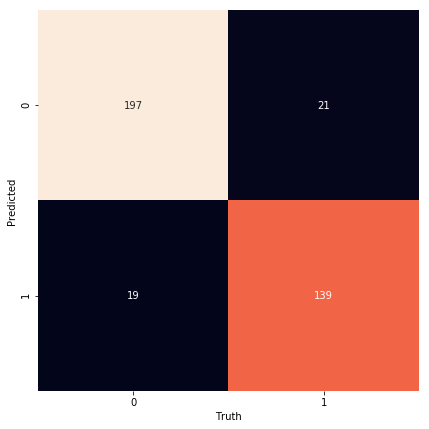

In [139]:
from sklearn.metrics import confusion_matrix
cm_train_gnb = confusion_matrix(y_train,predicted)
names = np.unique(predicted)
sns.heatmap(cm_train_gnb, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Truth')
plt.ylabel('Predicted')

In [140]:
print(metrics.classification_report(y_train,predicted)) 
Train_Accuracy_gnb=accuracy_score(y_train,predicted)
print('Training Accuracy is:',Train_Accuracy_gnb) 

              precision    recall  f1-score   support

           0       0.91      0.90      0.91       218
           1       0.87      0.88      0.87       158

   micro avg       0.89      0.89      0.89       376
   macro avg       0.89      0.89      0.89       376
weighted avg       0.89      0.89      0.89       376

Training Accuracy is: 0.8936170212765957


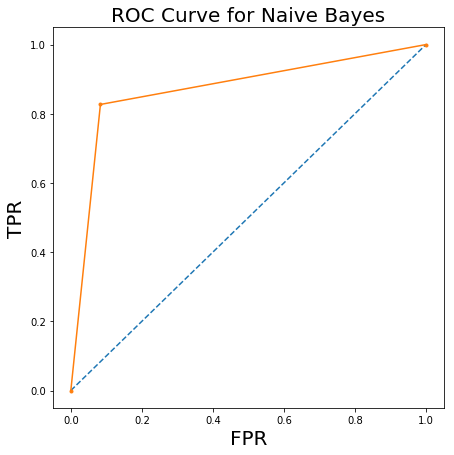

In [141]:
#ROC Curve for Naive Bayes
plt.figure()
plt.rcParams['figure.figsize'] = 7,7
fpr,tpr,threshold = roc_curve(y_test,y_pred)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('FPR',fontsize = 20)
plt.ylabel('TPR',fontsize = 20)
plt.title('ROC Curve for Naive Bayes',fontsize = 20)
plt.show()

In [142]:
### Conclusion for  Naive Bayes Approach ###
# Training accuracy is .8936
# Testing accuracy is .8790

# Prediction using Decision Tree

In [143]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import tree
import pydotplus
import collections
dt = DecisionTreeClassifier()
dt

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [144]:
dt_model_test = dt.fit(X_train, y_train)
print("score: ", dt.score(X_test,y_test))
pred_dt = dt.predict(X_test)
print(pred_dt)

score:  0.8387096774193549
[1 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0
 1 0 1 1 1 0 0 0 0 0 0 1 1 1 1 0 1 1 0 0 1 0 0 0 1 1 0 1 0 1 1 0 1 0 0 1 0
 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0
 0 1 0 0 1 0 0 1 1 0 0 0 0]


Text(47.040000000000006, 0.5, 'Predicted')

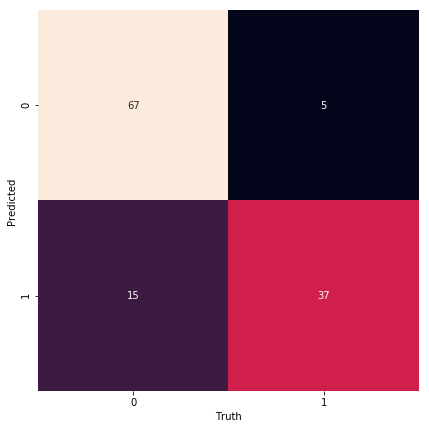

In [145]:
from sklearn.metrics import confusion_matrix
cm_test_dt = confusion_matrix(y_test,pred_dt)
names = np.unique(pred_dt)
sns.heatmap(cm_test_dt, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Truth')
plt.ylabel('Predicted')
 

In [146]:
print(metrics.classification_report(y_test,pred_dt)) 
Test_Accuracy_dt=accuracy_score(y_test,pred_dt)
print('Testing Accuracy Score :',Test_Accuracy_dt)

              precision    recall  f1-score   support

           0       0.82      0.93      0.87        72
           1       0.88      0.71      0.79        52

   micro avg       0.84      0.84      0.84       124
   macro avg       0.85      0.82      0.83       124
weighted avg       0.84      0.84      0.84       124

Testing Accuracy Score : 0.8387096774193549


In [147]:
dt_model_train= dt.fit(X_test, y_test)
predicted_dt = dt.predict(X_train)
print(predicted_dt)

[1 0 1 1 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 0 0
 0 0 1 1 1 1 0 1 0 0 1 0 0 1 1 0 0 1 0 1 1 1 0 0 1 1 1 0 1 1 1 1 0 0 0 1 0
 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0
 1 0 0 1 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 1 0 1 1 1
 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 1 1 1 0 0 0 0 0 0 1 1
 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0
 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 1 1
 1 0 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 1 1 1 0 1]


Text(47.040000000000006, 0.5, 'Predicted')

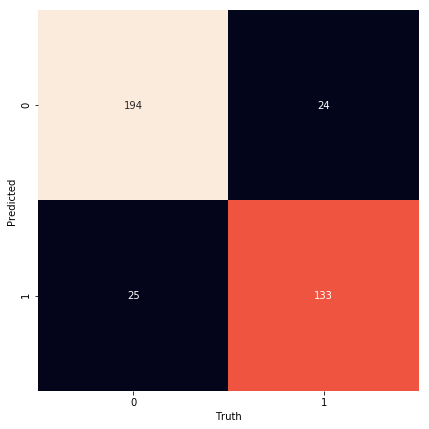

In [148]:
from sklearn.metrics import confusion_matrix
cm_train_dt = confusion_matrix(y_train,predicted_dt)
names = np.unique(predicted_dt)
sns.heatmap(cm_train_dt, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Truth')
plt.ylabel('Predicted')

In [149]:
print(metrics.classification_report(y_train,predicted_dt)) 
Training_Accuracy_dt=accuracy_score(y_train,predicted_dt)
print('Training Accuracy is :',Training_Accuracy_dt) 

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       218
           1       0.85      0.84      0.84       158

   micro avg       0.87      0.87      0.87       376
   macro avg       0.87      0.87      0.87       376
weighted avg       0.87      0.87      0.87       376

Training Accuracy is : 0.8696808510638298


In [150]:
data_feature_names = [ 'GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR', 'CGPA',
       'Research']
# Visualize data
dot_data = tree.export_graphviz(dt,
                                feature_names=data_feature_names,
                                out_file=None,
                                filled=True,
                                rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)

colors = ('turquoise', 'orange')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

graph.write_png('tree.png')

True

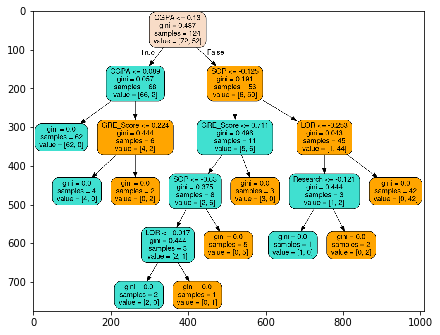

In [151]:
im = plt.imread('tree.png')
plt.imshow(im)
plt.show()

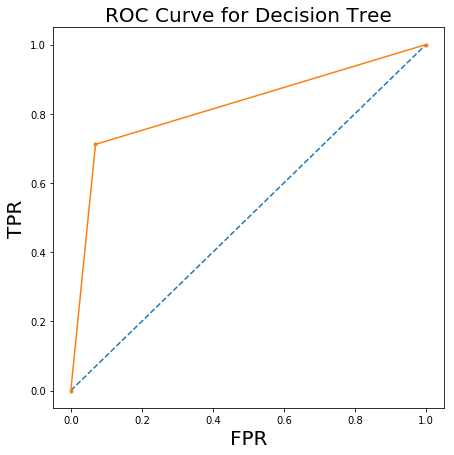

In [152]:
#ROC Curve for Decision Tree
plt.figure()
plt.rcParams['figure.figsize'] = 7,7
fpr,tpr,threshold = roc_curve(y_test,pred_dt)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('FPR',fontsize = 20)
plt.ylabel('TPR',fontsize = 20)
plt.title('ROC Curve for Decision Tree',fontsize = 20)
plt.show()

In [153]:
### Conclusion for  Decision Tree Approach ###
# Training accuracy is .8563
# Testing accuracy is .8709

# Prediction using Random Forest

In [154]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', oob_score = True) 
rf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [155]:
Model_rf_test = rf.fit(X_train, y_train)
print("score: ", rf.score(X_test,y_test))
pred_rf = rf.predict(X_test)
print(pred_rf)

score:  0.8870967741935484
[1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0
 1 0 1 1 1 0 0 0 0 0 0 1 1 1 1 0 1 1 0 0 1 0 0 0 1 1 0 1 1 1 1 0 1 0 0 1 0
 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0
 0 1 0 0 1 0 0 1 1 0 0 1 0]


In [156]:
# we can predict probabilities also
pred_rf_prob = rf.predict_proba(X_test)[::,1]
pred_rf_prob[0:10]

array([1.  , 0.  , 0.47, 1.  , 0.05, 0.35, 0.07, 0.03, 0.07, 0.33])

Text(47.040000000000006, 0.5, 'Predicted')

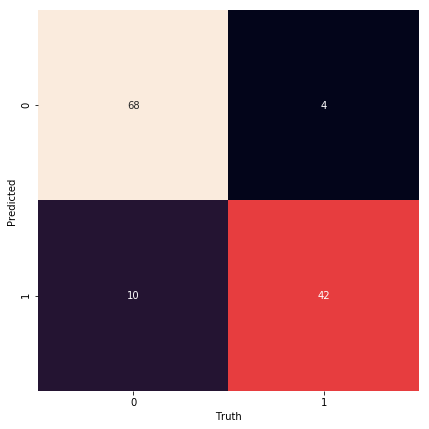

In [157]:
cm_test_rf= confusion_matrix(y_test,pred_rf)
names = np.unique(pred_rf)
sns.heatmap(cm_test_rf, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Truth')
plt.ylabel('Predicted')

In [158]:
Test_Accuracy_rf=accuracy_score(y_test,pred_rf)
print('Testing Accuracy is :',Test_Accuracy_rf) 
print(metrics.classification_report(y_test, pred_rf)) 

Testing Accuracy is : 0.8870967741935484
              precision    recall  f1-score   support

           0       0.87      0.94      0.91        72
           1       0.91      0.81      0.86        52

   micro avg       0.89      0.89      0.89       124
   macro avg       0.89      0.88      0.88       124
weighted avg       0.89      0.89      0.89       124



In [159]:
Model_rf_train = rf.fit(X_test, y_test)
predicted_rf = rf.predict(X_train)
print(predicted_rf)

[1 0 1 1 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 0 0
 0 0 1 1 1 1 0 1 0 0 1 0 0 1 1 0 0 1 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1 0
 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 1 1 1 0 0 0 0
 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 1 0 1 1 1
 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0
 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 1
 1 1 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 1 1 1 0 1]


Text(47.040000000000006, 0.5, 'Predicted')

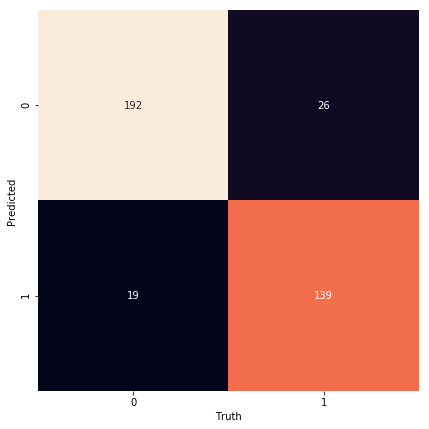

In [160]:
cm_train_rf = confusion_matrix(y_train,predicted_rf)
names = np.unique(predicted_rf)
sns.heatmap(cm_train_rf, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Truth')
plt.ylabel('Predicted')

In [161]:
print(metrics.classification_report(y_train,predicted_rf)) 
Training_Accuracy_rf=accuracy_score(y_train,predicted_rf)
print('Training Accuracy is :', Training_Accuracy_rf) 

              precision    recall  f1-score   support

           0       0.91      0.88      0.90       218
           1       0.84      0.88      0.86       158

   micro avg       0.88      0.88      0.88       376
   macro avg       0.88      0.88      0.88       376
weighted avg       0.88      0.88      0.88       376

Training Accuracy is : 0.8803191489361702


In [162]:
accuracy = metrics.accuracy_score(y_test, pred_rf)
print(f'Out-of-bag score estimate: {rf.oob_score_:.3}')
print(f'Mean Accuracy score: {accuracy: .3}')

Out-of-bag score estimate: 0.903
Mean Accuracy score:  0.887


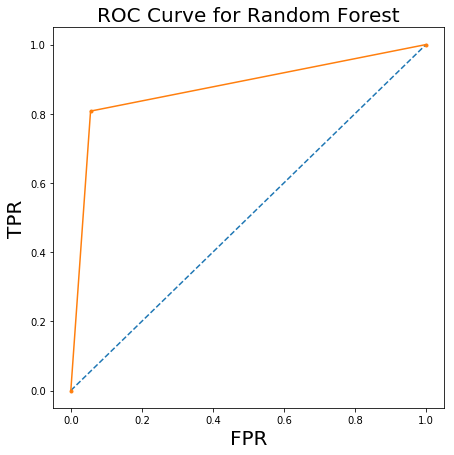

In [163]:
#ROC Curve for Random Forest
plt.figure()
plt.rcParams['figure.figsize'] = 7,7
fpr,tpr,threshold = roc_curve(y_test,pred_rf)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.xlabel('FPR',fontsize = 20)
plt.ylabel('TPR',fontsize = 20)
plt.title('ROC Curve for Random Forest',fontsize = 20)
plt.show()

In [164]:
### Conclusion for Random Forest Approach ###
# Training accuracy is .8776
# Testing accuracy is .8790

# Random Forest Feature Importance

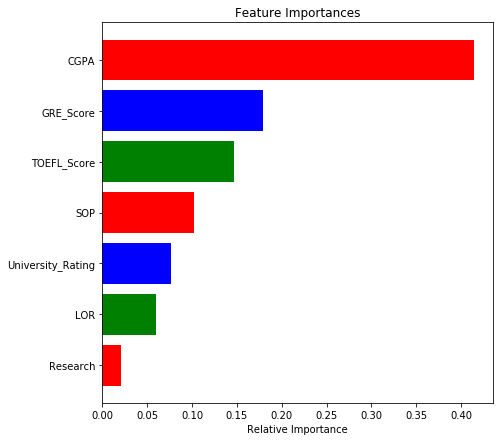

In [165]:
category = ['GRE_Score','TOEFL_Score','University_Rating','SOP','LOR','CGPA','Research','Chance_of_Admit']
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='rgb', align='center')
plt.yticks(range(len(indices)), [category[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Comparison of Models After Cross validation

In [166]:
random_seed = 12

In [167]:
outcome = []
model_names = []
models = [('DecTree', DecisionTreeClassifier()),
          ('KNN', KNeighborsClassifier()),
          ('RanFor', RandomForestClassifier()),
          ('GaussianNB', GaussianNB())]

In [168]:
from sklearn import model_selection
for model_name, model in models:
    k_fold_validation = model_selection.KFold(n_splits=10, random_state=random_seed)
    results = model_selection.cross_val_score(model,X_test,y_test, cv=k_fold_validation, scoring='accuracy')
    outcome.append(results)
    model_names.append(model_name)
    output_message = "%s| Mean=%f STD=%f" % (model_name, results.mean(), results.std())
    print(output_message)

DecTree| Mean=0.839744 STD=0.058189
KNN| Mean=0.879487 STD=0.072512
RanFor| Mean=0.903846 STD=0.060134
GaussianNB| Mean=0.872436 STD=0.093443


/home/kavita/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/kavita/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/kavita/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/kavita/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/kavita/anaconda3/lib/python3.7/site-pa

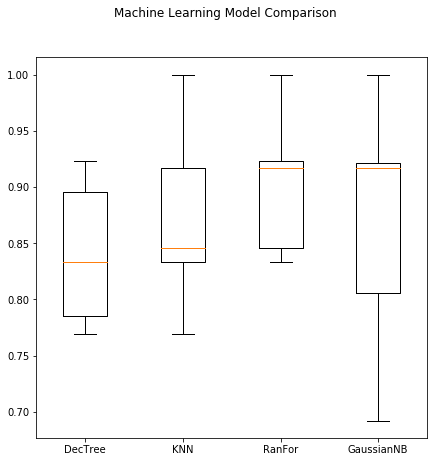

In [169]:
fig = plt.figure()
fig.suptitle('Machine Learning Model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(outcome)
ax.set_xticklabels(model_names)
plt.show()
